In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
data = pd.read_csv('spam.csv', encoding='latin1')

In [113]:
len(data)

5572

In [114]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
import warnings
warnings.filterwarnings(action='ignore')

In [117]:
data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
# 결측치 판단
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [119]:
data.isnull().values.any()

False

In [120]:
data['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [121]:
data['v2'].nunique()

5169

In [122]:
data.drop_duplicates(subset=['v2'], inplace=True) # 중복제거

In [123]:
len(data)

5169

<Axes: xlabel='v1'>

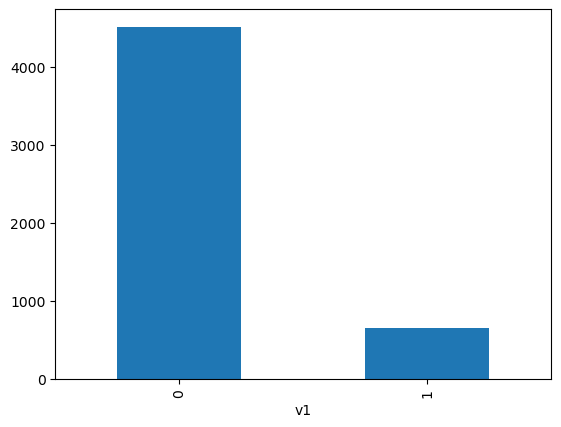

In [124]:
data['v1'].value_counts().plot(kind='bar')

In [125]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [126]:
X_data = data['v2']
y_data = data['v1']

print(X_data, y_data)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64


In [127]:
print(f'HAM MAIL : {round(y_data.value_counts()[0]/len(data)*100, 2)}%')
print(f'SPAM MAIL : {round(y_data.value_counts()[1]/len(data)*100, 2)}%')

HAM MAIL : 87.37%
SPAM MAIL : 12.63%


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
# stratify : 해당 변수의 어떤 값을 기준으로 비율을 맞추어주고 싶은지 설정

In [129]:
print('Train DATA')
print(f'HAM MAIL : {round(y_train.value_counts()[0]/len(y_train)*100, 2)}%')
print(f'SPAM MAIL : {round(y_train.value_counts()[1]/len(y_train)*100, 2)}%')

Train DATA
HAM MAIL : 87.38%
SPAM MAIL : 12.62%


In [130]:
print('Test DATA')
print(f'HAM MAIL : {round(y_test.value_counts()[0]/len(y_test)*100, 2)}%')
print(f'SPAM MAIL : {round(y_test.value_counts()[1]/len(y_test)*100, 2)}%')

Test DATA
HAM MAIL : 87.33%
SPAM MAIL : 12.67%


In [131]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [132]:
print(X_train_encoded[:5])

[[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180], [556, 23, 218, 752, 316], [12, 854, 583, 61, 24, 397, 2, 16, 1160, 30, 3, 67, 1160, 74, 65], [127, 37, 619, 620, 621, 17, 113, 62, 3489, 12, 142, 925, 4, 3490, 15, 3491, 855, 8, 38, 4, 3492, 201, 60, 1018, 33, 3, 55], [3493, 1335, 22, 2318]]


In [133]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'for': 11, 'my': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, '2': 17, 'that': 18, 'call': 19, 'on': 20, 'are': 21, 'now': 22, 'so': 23, 'not': 24, 'but': 25, 'can': 26, "i'm": 27, 'or': 28, 'at': 29, 'do': 30, 'get': 31, 'will': 32, 'if': 33, 'we': 34, 'be': 35, 'just': 36, 'ur': 37, 'with': 38, 'no': 39, 'this': 40, 'up': 41, 'gt': 42, 'lt': 43, 'how': 44, 'when': 45, 'ok': 46, '4': 47, 'from': 48, 'out': 49, 'go': 50, 'what': 51, 'all': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'then': 57, 'good': 58, 'time': 59, 'come': 60, 'was': 61, 'am': 62, 'he': 63, 'its': 64, 'day': 65, 'there': 66, 'want': 67, 'text': 68, 'only': 69, 'love': 70, 'going': 71, 'send': 72, 'lor': 73, 'one': 74, 'by': 75, 'home': 76, 'as': 77, 'need': 78, 'still': 79, 'txt': 80, 'see': 81, 'about': 82, 'r': 83, 'stop': 84, 'our': 85, 'da': 86, "i'll": 87, 'take': 88, 'reply': 89, 'think': 90, 'sorry': 91, 'bac

In [134]:
vocab_size = len(word_to_index) + 1
vocab_size

7816

In [135]:
print('최대 길이 : ', max(len(l) for l in X_train_encoded))
print('평균 길이 : ', (sum(map(len, X_train_encoded))/len((X_train_encoded))))

최대 길이 :  121
평균 길이 :  15.514631197097945


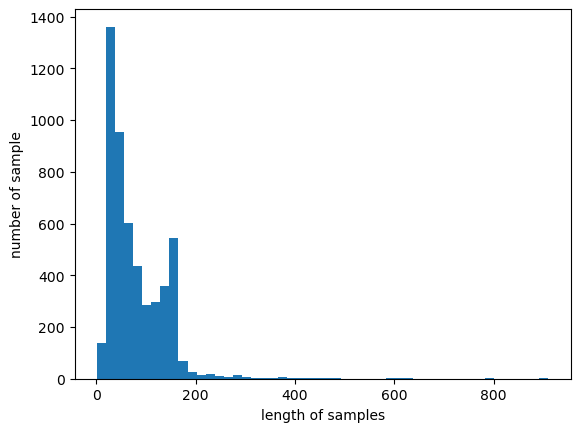

In [136]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of sample')
plt.show()

In [137]:
# 패딩처리
X_train_padded = pad_sequences(X_train_encoded, maxlen=130)
print(X_train_padded.shape)

(4135, 130)


In [138]:
X_train_padded

array([[   0,    0,    0, ...,    7, 3488,  180],
       [   0,    0,    0, ...,  218,  752,  316],
       [   0,    0,    0, ..., 1160,   74,   65],
       ...,
       [   0,    0,    0, ..., 1798, 2414,  454],
       [   0,    0,    0, ...,  444,  487,  981],
       [   0,    0,    0, ..., 7815, 1263,  184]], dtype=int32)

In [139]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 1s 16ms/step - loss: 0.5052 - accuracy: 0.7539 - val_loss: 0.3268 - val_accuracy: 0.8803
Epoch 2/4
52/52 [==============================] - 1s 15ms/step - loss: 0.2458 - accuracy: 0.9501 - val_loss: 0.1373 - val_accuracy: 0.9686
Epoch 3/4
52/52 [==============================] - 1s 15ms/step - loss: 0.1215 - accuracy: 0.9761 - val_loss: 0.1046 - val_accuracy: 0.9710
Epoch 4/4
52/52 [==============================] - 1s 15ms/step - loss: 0.0607 - accuracy: 0.9876 - val_loss: 0.0454 - val_accuracy: 0.9891


In [141]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=130)

In [142]:
print('test acc : ', model.evaluate(X_test_padded, y_test)[1])

33/33 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9749
test acc :  0.9748549461364746


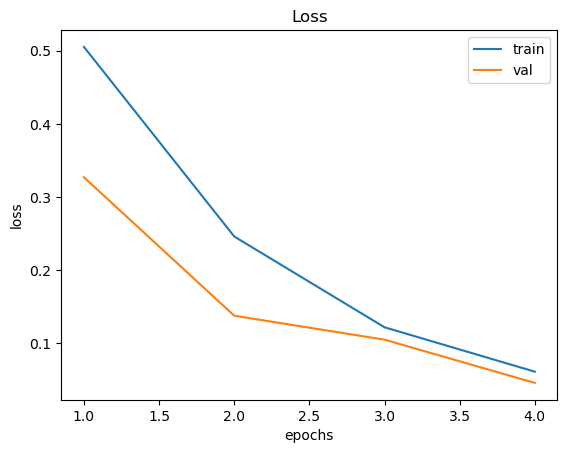

In [143]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()

In [144]:
# 특수기호가 스팸메일을 분류해주는 기준이 될 수 있기 때문에, 제거를 해주지 않았다.

In [145]:
# 밑 코드는 특수기호를 제거했을 때의 결과값

In [175]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [176]:
data = pd.read_csv('spam.csv', encoding='latin1')

In [177]:
len(data)

5572

In [178]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [179]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
test_length = data['v2'].apply(len)
test_length.head()

0    111
1     29
2    155
3     49
4     61
Name: v2, dtype: int64

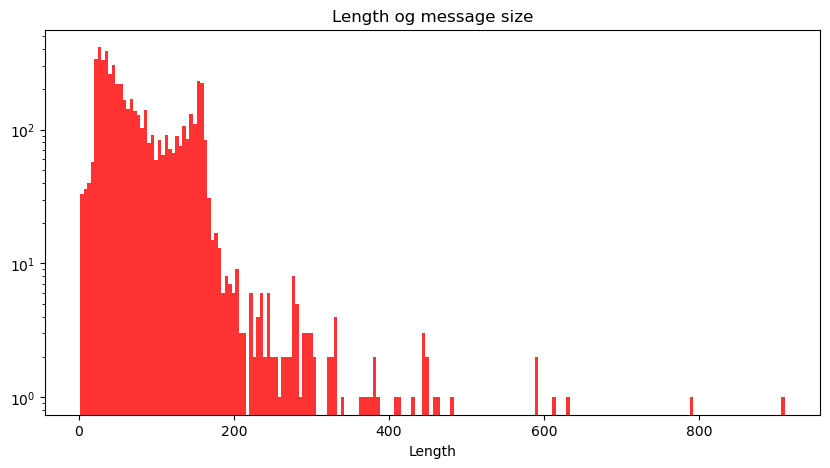

In [181]:
plt.figure(figsize=(10,5))

plt.hist(test_length, bins=200, alpha=0.8, color='r', label='word')
plt.yscale('log')

plt.xlabel('Length')
plt.title('Length og message size')
plt.show()

In [182]:
print('최대 길이 : ', np.max(test_length))
print('최소 길이 : ', np.min(test_length))
print('평균 길이 : {:.2f}'.format(np.mean(test_length)))
print('표준편차 : {:.2f}'.format(np.std(test_length)))
print('중간 값 : ', np.median(test_length))

최대 길이 :  910
최소 길이 :  2
평균 길이 : 80.12
표준편차 : 59.69
중간 값 :  61.0


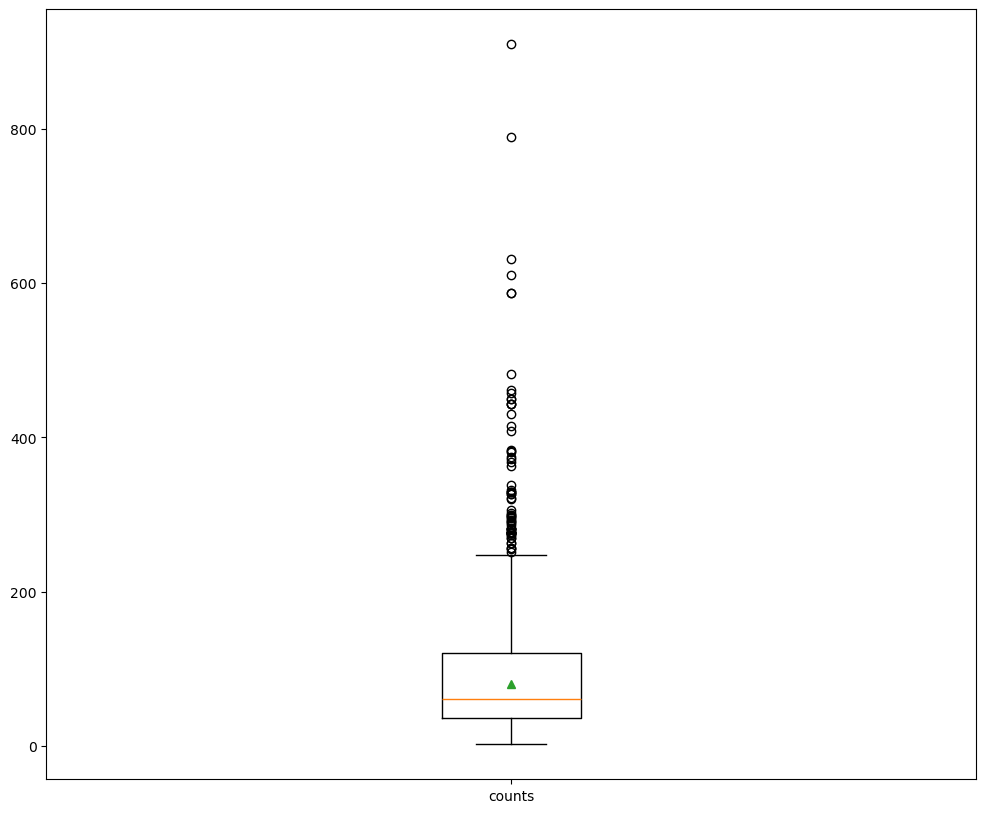

In [183]:
plt.figure(figsize=(12, 10))

plt.boxplot(test_length, labels=['counts'], showmeans=True)
plt.show()

In [184]:
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [185]:
data.drop_duplicates(subset=['v2'], inplace=True) # 중복제거

In [186]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,ham,4516
1,spam,653


In [187]:
X_data = data['v2']
y_data = data['v1']

print(X_data, y_data)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5169, dtype: object


In [188]:
print(f'HAM MAIL : {round(y_data.value_counts()[0]/len(data)*100, 2)}%')
print(f'SPAM MAIL : {round(y_data.value_counts()[1]/len(data)*100, 2)}%')

HAM MAIL : 87.37%
SPAM MAIL : 12.63%


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [190]:
print('Train DATA')
print(f'HAM MAIL : {round(y_train.value_counts()[0]/len(y_train)*100, 2)}%')
print(f'SPAM MAIL : {round(y_train.value_counts()[1]/len(y_train)*100, 2)}%')

Train DATA
HAM MAIL : 87.38%
SPAM MAIL : 12.62%


In [191]:
print('Test DATA')
print(f'HAM MAIL : {round(y_test.value_counts()[0]/len(y_test)*100, 2)}%')
print(f'SPAM MAIL : {round(y_test.value_counts()[1]/len(y_test)*100, 2)}%')

Test DATA
HAM MAIL : 87.33%
SPAM MAIL : 12.67%


In [196]:
# 문자열의 replace() 메서드를 사용하여 특수기호 제거
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

def preprocessing(review, remove_stopwords):
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    words = review_text.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_review = ' '.join(words)
    else:
        clean_review = ' '.join(words)

    return clean_review

In [197]:
clean_X_data = []

for v2 in X_data:
    clean_X_data.append(preprocessing(v2, True))

print(clean_X_data[0])

go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [198]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [199]:
print(X_train_encoded[:5])

[[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180], [556, 23, 218, 752, 316], [12, 854, 583, 61, 24, 397, 2, 16, 1160, 30, 3, 67, 1160, 74, 65], [127, 37, 619, 620, 621, 17, 113, 62, 3489, 12, 142, 925, 4, 3490, 15, 3491, 855, 8, 38, 4, 3492, 201, 60, 1018, 33, 3, 55], [3493, 1335, 22, 2318]]


In [200]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'for': 11, 'my': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, '2': 17, 'that': 18, 'call': 19, 'on': 20, 'are': 21, 'now': 22, 'so': 23, 'not': 24, 'but': 25, 'can': 26, "i'm": 27, 'or': 28, 'at': 29, 'do': 30, 'get': 31, 'will': 32, 'if': 33, 'we': 34, 'be': 35, 'just': 36, 'ur': 37, 'with': 38, 'no': 39, 'this': 40, 'up': 41, 'gt': 42, 'lt': 43, 'how': 44, 'when': 45, 'ok': 46, '4': 47, 'from': 48, 'out': 49, 'go': 50, 'what': 51, 'all': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'then': 57, 'good': 58, 'time': 59, 'come': 60, 'was': 61, 'am': 62, 'he': 63, 'its': 64, 'day': 65, 'there': 66, 'want': 67, 'text': 68, 'only': 69, 'love': 70, 'going': 71, 'send': 72, 'lor': 73, 'one': 74, 'by': 75, 'home': 76, 'as': 77, 'need': 78, 'still': 79, 'txt': 80, 'see': 81, 'about': 82, 'r': 83, 'stop': 84, 'our': 85, 'da': 86, "i'll": 87, 'take': 88, 'reply': 89, 'think': 90, 'sorry': 91, 'bac

In [201]:
vocab_size = len(word_to_index) + 1
vocab_size

7816

In [202]:
print('최대 길이 : ', max(len(l) for l in X_train_encoded))
print('평균 길이 : ', (sum(map(len, X_train_encoded))/len((X_train_encoded))))

최대 길이 :  121
평균 길이 :  15.514631197097945


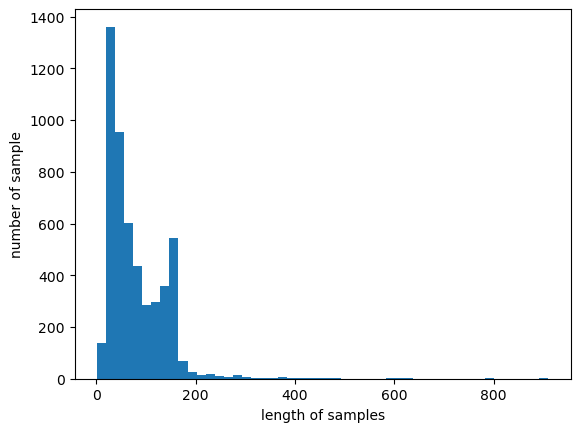

In [203]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of sample')
plt.show()

In [204]:
X_train_padded = pad_sequences(X_train_encoded, maxlen=130)
print(X_train_padded.shape)

(4135, 130)


In [205]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=130)

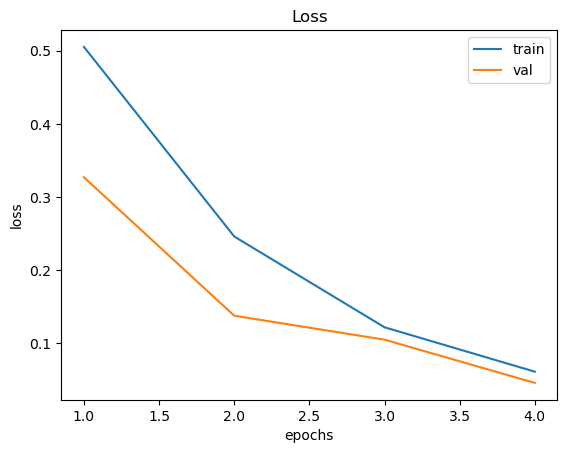

In [208]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()